# NLP 2025
# Lab 3: Attention and Pre-trained Models

Our practical journey in NLP has so far covered the following:

🧪 Lab 1: Tokenize and pre-process text in different ways.

🧠 Lab 2: Train different representation models (e.g. TF-IDF) and/or use pre-trained word embeddings with useful applications (such as information retrieval).

🚀 We will now escalate from using pre-trained static word embeddings to use pre-trained models (like BERT). The model is pre-trained on vast amounts of data 📚 and that allows for better generalization. As we discussed in class, BERT models are based on transformers 🤖, which use attention to model sequences (in our case sequences of words).

💡 BERT provides for contextualized embeddings, aka the embedding vector of a word is only determined once the actual context of that word is known. 👉 Practically, this allows for words to have different embedding vectors depending on their actual context (e.g. think of the word "bank" 🏦🏞️ and its multiple meanings in different contexts).

In this lab, we will learn how to load and use pre-trained models (e.g. BERT) from Huggingface 🤗.

By the end of this lab you should be able to:

- 🧠📦Load and/or use pre-trained models and tokenizers to solve different NLP tasks
- 🔍🧬 Inspect and analyze the inner workings (hidden layers etc.) of attention models (like BERT)
- 🧲📝 Use attention models to get sentence representations (aka sentence embeddings)
- 📚🎯 Use BERT sentence embeddings to solve more complicated tasks like information retrieval
- ⚖️📊 Compare performance of different models and assess their effectiveness
- 🛠️🐍 Load and use the basics of pytorch and huggingface transformers (important frameworks in NLP)

### Score breakdown

| Exercise            | Points |
|---------------------|--------|
| [Exercise 1](#e1)   | 1      |
| [Exercise 2](#e2)   | 3      |
| [Exercise 3](#e3)   | 5      |
| [Exercise 4](#e4)   | 2      |
| [Exercise 5](#e5)   | 10     |
| [Exercise 6](#e6)   | 5      |
| [Exercise 7](#e7)   | 10     |
| [Exercise 8](#e8)   | 2      |
| [Exercise 9](#e9)   | 1      |
| [Exercise 10](#e10) | 3      |
| [Exercise 11](#e11) | 10     |
| [Exercise 12](#e12) | 3      |
| [Exercise 13](#e13) | 10     |
| [Exercise 14](#e14) | 10     |
| [Exercise 15](#e15) | 15     |
| [Exercise 16](#e16) | 10     |
| Total               | 100    |

This score will be scaled down to 1 and that will be your final lab score.

### 📌 **Instructions for Delivery** (📅 **Deadline: 2/May 18:00**, 🎭 *wildcards possible*)

✅ **Submission Requirements**
+ 📄 You need to submit a **PDF of your report** (use the templates provided in **LaTeX** 🖋️ (*preferred*) or **Word** 📑) and a **copy of your notebook** 📓 with the code.
+ ⚡ Make sure that **all cells are executed properly** ⚙️ and that **all figures/results/plots** 📊 you include in the report are also visible in your **executed notebook**.

✅ **Collaboration & Integrity**
+ 🗣️ While you may **discuss** the lab with others, you must **write your solutions with your group only**. If you **discuss specific tasks** with others, please **include their names** in the appendix of the report.
+ 📜 **Honor Code applies** to this lab. For more details, check **Syllabus §7.2** ⚖️.
+ 📢 **Mandatory Disclosure**:
   - Any **websites** 🌐 (e.g., **Stack Overflow** 💡) or **other resources** used must be **listed and disclosed**.
   - Any **GenAI tools** 🤖 (e.g., **ChatGPT**) used must be **explicitly mentioned**.
   - 🚨 **Failure to disclose these resources is a violation of academic integrity**. See **Syllabus §7.3** for details.

## 0. Setup (Huggingface + PyTorch  = ❤️)

You should know the drill by now. As in the last lab, we will be using huggingface datasets library ([https://huggingface.co/datasets](https://huggingface.co/datasets)). You can find the detailed documentation and tutorials here: [https://huggingface.co/docs/datasets/en/index](https://huggingface.co/docs/datasets/en/index)

If you don't have it installed you can run the code below (if in Google Colab) or copy the code to the terminal (if you run locally):

In [4]:
! pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

Next, we will need [PyTorch](https://pytorch.org/) installed. It is a very popular deep learning library that offers modularized versions of many of the sequence models we discussed in class. It's an important tool that you may want to practice further if you want to dive deeper into NLP, since much of the current academic and industrial research uses it.

Some resources to look further are given below.

* [Documentation](https://pytorch.org/docs/stable/index.html) (We will need this soon)

* [Installation Instructions](https://pytorch.org/get-started/locally/)

* [Quickstart Tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)

The cell below should install the library:

In [5]:
! pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

The last bit we need is the huggingface transformers library (here is the documentation [https://huggingface.co/docs/transformers/en/index](https://huggingface.co/docs/transformers/en/index)). Transformers are one of the most influential architectures in handling sequences (not only in language). As we discussed in lectures, they excel at taking into account context (which is the salt-and-pepper of NLP) with mechansisms such as self-attetion, which allows them to weigh the importance of different words in a sentence. If you want to know more, revisit the course material (slides and textbook).

We already used huggingface datasets in previous labs and huggingface transformers integrates nicely with that. Apart from the ease of use, huggingface is also providing pre-trained models of different kinds. The list can be found [here](https://huggingface.co/models) ([https://huggingface.co/models](https://huggingface.co/models)). The following line should be enough to install huggingface transformers library:

In [6]:
! pip install transformers

As usual, we start by importing some essential Python libraries that we will be using.

In [7]:
import math

import numpy as np
import matplotlib.pyplot as plt
import datasets
import transformers
import tqdm
import torch

## 1. Load and Preprocess Data

For easiness and comparison purposes, we will ue the same dataset as in the previous lab. That will help us re-visit the approach and see whether contextualized architectures can do better in the same problem/task/dataset.

As a reminder:

*Sentence compression* involves rephrasing sentences to make them shorter while still retaining the original meaning. A reliable compression system would be valuable for mobile devices and could also serve as a component in an extractive summarization system.

The dataset we are going to use can be found on [Huggingface](https://huggingface.co/datasets/embedding-data/sentence-compression). It concerns a set of 180,000 pairs of sentences, aka it is a parallel corpus of sentences and their equivalent compressions. It has been collected by harvesting news articles from the Internet where the headline appears to be similar to the first sentence and that property is used to find an "extractive" compression of the sentence.

For example, for the sentence

`"Regulators Friday shut down a small Florida bank, bringing to 119 the number of US bank failures this year amid mounting loan defaults"`

the compressed equivalent (based on the dataset) is:

`"Regulators shut down small Florida bank"`.


For more information you can read the original paper (from Google) [here](https://aclanthology.org/D13-1155.pdf).

### 1.1 Loading the Dataset

The dataset will be loaded as a huggingface datgaset. This may take a few minutes because of the large size of the data.

Make sure to inspect the dataset and make sure it is imported properly.

In [8]:
ds = datasets.load_dataset('embedding-data/sentence-compression')
print(ds)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.88k [00:00<?, ?B/s]

sentence-compression_compressed.jsonl.gz:   0%|          | 0.00/14.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/180000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['set'],
        num_rows: 180000
    })
})


In [9]:
for i in range(10):
    print(ds['train'][i])

{'set': ["The USHL completed an expansion draft on Monday as 10 players who were on the rosters of USHL teams during the 2009-10 season were selected by the League's two newest entries, the Muskegon Lumberjacks and Dubuque Fighting Saints.", 'USHL completes expansion draft']}
{'set': ['Major League Baseball Commissioner Bud Selig will be speaking at St. Norbert College next month.', 'Bud Selig to speak at St. Norbert College']}
{'set': ["It's fresh cherry time in Michigan and the best time to enjoy this delicious and nutritious fruit.", "It's cherry time"]}
{'set': ['An Evesham man is facing charges in Pennsylvania after he allegedly dragged his girlfriend from the side of his pickup truck on the campus of Kutztown University in the early morning hours of Dec. 5, police said.', 'Evesham man faces charges for Pa.']}
{'set': ["NRT LLC, one of the nation's largest residential real estate brokerage companies, announced several executive appointments within its Coldwell Banker Residential B

The dataset comes with a `train` split so we will have to split that into `train`/`test` ourselves with the line below.

In [10]:
split_ds = ds['train'].train_test_split(test_size=0.2)
print(split_ds)

DatasetDict({
    train: Dataset({
        features: ['set'],
        num_rows: 144000
    })
    test: Dataset({
        features: ['set'],
        num_rows: 36000
    })
})


Note that previously, we had very much full control over the vocabulary of the dataset (in terms of pre-processing including tokenization). That is because we wanted to build our own embedding model.

By using a *pre-trained* model (like we are going to do at this lab), we need to adhere to the way this model was trained (including the tokenization). Huggingface provides the models, along with the relevant tokenizers, therefore cleaning is not necessary (as in previous labs). You can still include it if you think this would improve the results of the retrieval in the later parts of the lab.

<a name='e1'></a>
### Exercise 1 Unpacking the set
(1p) Instead of cleaning, we will unpack the `set` (containing tuples of full and compressed sentences) column into separate `sentence` and `compressed` columns. This will make it a bit easier for us later.

One key difference in this function is the fact that it will accept a batch of examples (instead of a single example in the exercises in the previous lab). You can iterate through the examples this way:

```
for set in examples['set']
```

The new columns should be lists containing strings (full or compressed sentences) extracted from the `set` column.

Fill in the function below to complete this task

In [11]:
def unpack(examples):
    """
    Unpacks the column `set` into two columns `sentence` and `compressed`.
    Args:
        examples: a batch of examples from the dataset

    Returns: modified examples with two new columns: `sentence` and `compressed`

    """
    sentences = []
    compressed_sentences = []

    ### YOUR CODE HERE
    for sentence, compressed_sentence in examples['set']:
        sentences.append(sentence)
        compressed_sentences.append(compressed_sentence)
    ### YOUR CODE ENDS HERE

    examples['sentence'] = sentences
    examples['compressed'] = compressed_sentences
    return examples

In the next cell, we will apply the `unpack` function to the whole dataset. Notice that we also drop the original `set` column.

In [12]:
split_ds = split_ds.map(unpack, batched=True, remove_columns=['set'])
print(split_ds)

Map:   0%|          | 0/144000 [00:00<?, ? examples/s]

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'compressed'],
        num_rows: 144000
    })
    test: Dataset({
        features: ['sentence', 'compressed'],
        num_rows: 36000
    })
})


Let's examine some examples from the dataset and make sure that we got the results we wanted.

In [13]:
for i in range(10):
    print(split_ds['train'][i])

{'sentence': 'A new report from IMS Health, a consulting firm, shows that Americans spent more than $307 billion on medicines prescription drugs in 2010.', 'compressed': 'Americans spend billions on medicines prescription drugs'}
{'sentence': 'An Ave Maria law student has been charged with attempted murder and aggravated assault based on allegations he fired a gun at his roommate during a drunken incident in which he also threatened his ex-girlfriend.', 'compressed': 'Ave Maria law student is charged with attempted murder;'}
{'sentence': 'An Holocaust survivor from the US donated Monday personal items of victims of Auschwitz to Yad Vashem, the Holocaust Memorial Institute in Jerusalem.', 'compressed': 'Holocaust survivor donates personal items from Auschwitz to Yad Vashem'}
{'sentence': 'OAKLAND ― A legal advocacy group says thousands of poor people in Alameda County will lose welfare benefits under a new policy aimed at cutting costs.', 'compressed': 'Thousands in Alameda Co. may lose

In this lab, we will be using only pre-trained models. That means that we won't be training any new model. This is the reason we can select only the `test` subset for the rest of the notebook (this is where we will be assessing the performance of the pre-trained models). At the same time, we will save much time, as we will not be processing the `train` subset.

In [14]:
test_ds = split_ds['test']
print(test_ds)

Dataset({
    features: ['sentence', 'compressed'],
    num_rows: 36000
})


### 1.2 Loading the Tokenizer

For the first part of this lab, we will be using a pre-trained BERT model from Huggingface, namely the [BERT Uncased](https://huggingface.co/google-bert/bert-base-uncased). You can read the original paper that introduced this model [here](https://aclanthology.org/N19-1423.pdf). This paper has been once of the most cited papers ever (currently having more than 100,000 citations).

We will specify the model name that can be found on the model's card on huggingface (revisit the first link). Make sure to check what other information Huggingface is offering (e.g. how to use the model, limitations, how to inference, etc.).

In [15]:
model_name = 'google-bert/bert-base-uncased'

The models on huggingface come with their own tokenizers. They are loaded separately from the models. We can use [AutoTokenizer](https://huggingface.co/docs/transformers/v4.40.2/en/model_doc/auto#transformers.AutoTokenizer)'s `from_pretrained()` method to load it.

Inspect the output: The loaded object is of `BertTokenizerFast` class. Check the documentation [here](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertTokenizerFast).

In [16]:
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
print(tokenizer)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

BertTokenizerFast(name_or_path='google-bert/bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)


Next, let's see how we can use it to tokenize some text.

In [17]:
print(test_ds[0]['sentence'])
tokenized = tokenizer(test_ds[0]['sentence'], padding=True, return_tensors='pt')
print("---")
print(type(tokenized))
print("---")
print(tokenized)

The Veterans Memorial Bridge over the Red River between Fargo and Moorhead, Minn., has been formally dedicated.
---
<class 'transformers.tokenization_utils_base.BatchEncoding'>
---
{'input_ids': tensor([[  101,  1996,  8244,  3986,  2958,  2058,  1996,  2417,  2314,  2090,
         23054,  1998, 16808,  4974,  1010,  8117,  2078,  1012,  1010,  2038,
          2042,  6246,  4056,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1]])}


Examine the outputs: The tokenizer returned three things:
- `input_ids` - this is a PyTorch tensor ([https://pytorch.org/docs/stable/tensors.html](https://pytorch.org/docs/stable/tensors.html)) with the indices of our tokens. PyTorch tensors are similar to numpy arrays. They hold data in a multidimensional array or matrix. The difference is that PyTorch tensors can be placed and modified on the GPU which greatly improves the speed of execution.
- `token_type_ids` - this tensor holds the information about the index of the sentence. This has to do with the classification objective from the original paper, where two sentences were given and the model had to predict if they are connected. Because we only included a single sentence, we have only zeros here. We will not be concerned with it in this lab.
- `attention_mask` - holds the mask that the model will use to determine if the tokens in the `input_ids` are the real tokens or *padding*. Padding is a technique used to ensure that all input sequences have the same length. BERT (like many other NLP models) process data in batches and requires each sequence in a batch to have the same length, so sequences that are shorter than the maximum sequence length in the batch are padded with special tokens. In this case, because we only inputted a single sentence, the mask contains only ones. Later you will see examples where this is not the case.

Let's see how exactly the sentence was tokenized and how we can retrieve the original text. Notice that some words have been split into multiple tokens (remember when we discussed sub-word tokenization in class?). Also pay attention to the added special tokens, namely `CLS` and `SEP`:

The `[CLS]` token is a special classification token added at the beginning of every input sequence. It stands for "classification" (daah!) and is used by BERT to aggregate information from the entire sequence. The final hidden state corresponding to this token (after passing through the transformer layers) is used as the aggregate sequence representation for classification tasks. We will use this later in the lab!

The `[SEP]` token is used to separate different segments or sentences within the input sequence. It stands for "separator" (daaah again!).

In [18]:
print(tokenized['input_ids'].shape)
print("---")
print(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0]))
print("---")
print(len(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])))
print("---")
print(tokenizer.decode(tokenized['input_ids'][0]))
print("---")
print(tokenizer.decode(tokenized['input_ids'][0], skip_special_tokens=True))

torch.Size([1, 25])
---
['[CLS]', 'the', 'veterans', 'memorial', 'bridge', 'over', 'the', 'red', 'river', 'between', 'fargo', 'and', 'moor', '##head', ',', 'min', '##n', '.', ',', 'has', 'been', 'formally', 'dedicated', '.', '[SEP]']
---
25
---
[CLS] the veterans memorial bridge over the red river between fargo and moorhead, minn., has been formally dedicated. [SEP]
---
the veterans memorial bridge over the red river between fargo and moorhead, minn., has been formally dedicated.


Tokenizer can process a list of sentences. This will create a batched output with tensor's first dimension corresponding to the batch size (the number of sentences we passed to the tokenizer). Examine the following cell and make sure it makes sense to you.

In [19]:
print(test_ds[0:3]['sentence'])
tokenized = tokenizer(test_ds[0:3]['sentence'], padding=True, return_tensors='pt')
print(tokenized)
print(tokenized['input_ids'].shape)
print(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0]))
print(len(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])))
print(tokenizer.decode(tokenized['input_ids'][0]))
print(tokenizer.decode(tokenized['input_ids'][0], skip_special_tokens=True))

['The Veterans Memorial Bridge over the Red River between Fargo and Moorhead, Minn., has been formally dedicated.', 'The Russian government will start grain interventions in the domestic market on Friday, deputy Agricultural Minister Sergei Korolyov said on Tuesday.', 'San Diego-based MeLLmo, the developer of the Roambi mobile business intelligence software applications for the iPhone, said today that it has expanded in Europe, and has opened up offices in the UK, France, Spain, and Germany.']
{'input_ids': tensor([[  101,  1996,  8244,  3986,  2958,  2058,  1996,  2417,  2314,  2090,
         23054,  1998, 16808,  4974,  1010,  8117,  2078,  1012,  1010,  2038,
          2042,  6246,  4056,  1012,   102,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0],
        [  101,  1996,  2845,  2231,  2097,  2707,  8982, 19388,  1999,  1996,
          49

<a name='e2'></a>
### Exercise 2 Questions about the tokenizer

Answer the following questions:
- (1p) What is the size of the vocabulary?
- (2p) What are the special tokens apart from `[CLS]` and `[SEP]`? What are their functions?

In [20]:
# (1p) What is the size of the vocabulary?
len(tokenizer.vocab)

30522

In [21]:
# (2p) What are the special tokens apart from `[CLS]` and `[SEP]`? What are their functions?
tokenizer.special_tokens_map
# The special tokens (besides [CLS] and [SEP]), in the order given, are:
# 	1.	[UNK] (unk_token):
# Represents any token that is not found in the vocabulary. When an out-of-vocabulary word or sub-word is encountered, it’s mapped to [UNK], allowing the model to handle unknown inputs gracefully.
# 	2.	[PAD] (pad_token):
# Used to “pad” shorter sequences up to the length of the longest sequence in a batch. This ensures that all inputs share the same shape ([batch_size, seq_len]). In the attention mask, padded positions get a 0 so that BERT ignores them during self-attention.
# 	3.	[MASK] (mask_token):
# Employed in the masked language modeling (MLM) objective during pre-training. Random tokens in the input are replaced with [MASK], and the model is trained to predict their original identity, which teaches it to build contextual representations.

{'unk_token': '[UNK]',
 'sep_token': '[SEP]',
 'pad_token': '[PAD]',
 'cls_token': '[CLS]',
 'mask_token': '[MASK]'}

### 1.4 Loading the Model

In this section, we will load and examine the model. We will start with selecting the device we will place the model on. This will be a GPU (if one is available) or a CPU.

Google Colab offers free access to GPU, provided there is availability (also baed on quotas which may vary based on your usage and the overall demand on Colab's resources). If you are working locally, then if you don't have a GPU, CPU will be selected. For the first parts of the assignment running on CPU might be okay but when we have to load the dataset a GPU will be necessary.

The following cell will select the device for us.

In [22]:
device = 'cuda:0' if torch.cuda.is_available() else 'mps'
print(f'Device: {device}')

Device: cuda:0


Now, let's load the model from huggingface and place it (slowly because it's heavy due to the large number of parameters) on the device from the previous cell (the methods `to()`).

In [23]:
model = transformers.AutoModel.from_pretrained(model_name)
model.to(device)
print(model)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

<a name='e3'></a>
### Exercise 3 Questions about the Model

Examine the output of the previous cells. Answer the following questions:
- (1p) What is the number of transformer layers in this model?
- (1p) What is the dimension of the embeddings?
- (1p) What is the hidden size of the FFN in the transformer layer?
- (1p) What is the total number of parameters of the model (hint: check the `num_parameters()` method of the model)?
- (1p) How can you find the vocabulary size from the model?

In [24]:
# (1p) What is the number of transformer layers in this model?
print("The number of transformer layers in this model is ", model.config.num_hidden_layers)

The number of transformer layers in this model is  12


In [25]:
# (1p) What is the dimension of the embeddings?
print("The dimension of the embeddings is ", model.config.hidden_size)

The dimension of the embeddings is  768


In [26]:
# (1p) What is the hidden size of the FFN in the transformer layer?
print("The hidden size of the FFN in the transformer layer is ", model.config.intermediate_size)

The hidden size of the FFN in the transformer layer is  3072


In [27]:
# (1p) What is the total number of parameters of the model (hint: check the `num_parameters()` method of the model)?
print("The total number of parameters of the model is ", model.num_parameters())

The total number of parameters of the model is  109482240


In [28]:
# (1p) How can you find the vocabulary size from the model?
print(model.config.vocab_size)

30522


Next, let's use BERT model for inference. We will tokenize the first sentence of our dataset and pass it to the model. We set `output_hidden_states` to `True` in order to have access to the hidden states of the model. Those represent the latent representations after embedding and transformer layers.

In [29]:
tokenized = tokenizer(test_ds[0]['sentence'], padding=True, return_tensors='pt').to(device)
print(tokenized)
model_output = model(**tokenized, output_hidden_states=True)

{'input_ids': tensor([[  101,  1996,  8244,  3986,  2958,  2058,  1996,  2417,  2314,  2090,
         23054,  1998, 16808,  4974,  1010,  8117,  2078,  1012,  1010,  2038,
          2042,  6246,  4056,  1012,   102]], device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1]], device='cuda:0')}


Examine the next cell and make sure everything makes sense to you. Consult the [documentation](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertModel.forward) in case of doubt.

In [30]:
print(list(model_output.keys()))
print(type(model_output['pooler_output']))
print(model_output['pooler_output'].shape)
print(type(model_output['hidden_states']))
print(len(model_output['hidden_states']))
print(type(model_output['hidden_states'][0]))
print(model_output['hidden_states'][0].shape)

['last_hidden_state', 'pooler_output', 'hidden_states']
<class 'torch.Tensor'>
torch.Size([1, 768])
<class 'tuple'>
13
<class 'torch.Tensor'>
torch.Size([1, 25, 768])


## 2. Exploring BERT hidden states

In this section we will look in more detail into the embeddings (latent representations) of BERT model. As a reminder, BERT embeddings a type of contextual word embeddings generated by the BERT model. They capture the meaning of words in the actual context. Notice the contrast with the static word embeddings we worked with in the previous lab: Then, we only needed a large corpus to compute word embeddings. In the case of BERT, we need to pass the actual sequence through the model to get the equivalent vector. More specifically, we tokenize the sentence (based on the relevant model and tokenizer), add the special tokanes (`CLS` and `SEP`, which are added authomatically by the tokenizer) and pass the sentence in the model.

<a name='e4'></a>
### Exercise 4 Plotting the layer-wise similarities between words

(2p) We will use the following function to plot the cosine similarity between tokens in different sentences. It takes `hidden_states` and `tokens_of_interest_ids` arguments. The `hidden_states` is a list of Tensors and contains the hidden states of the sentences. The size of the list is equal to the number of layers in the model (+1 for the initial embedding) and each element is a Tensor with the first dimension corresponding to the sentences in the batch and second to the tokens (see the previous code cell). The third dimension is the size of the embedding. The `tokens_of_interest_ids` is a list of integers of the size equal to the number of sentences. The integers are indices that identify tokens we want to compare with each other.

Fill in the function by first extracting the embeddings of the token-of-interest in a `layer` for two sentences `sent1` and `sent2`. Next, calculate the cosine similarity between the embeddings. You can use an existing PyTorch implementation of cosine similarity.

In [31]:
from typing import List
from itertools import combinations
import torch.nn.functional as F

def plot_evolving_similarities(hidden_states: List[torch.Tensor], tokens_of_interest_ids: List[int]):
    """
    Plots the evolving cosine similarity between the hidden representation of tokens in different sentences.
    Hidden states are provided as a list of tensors where each tensor corresponds to the layer of the model.
    Each tensor contains the hidden representations of each token (second dimension) of each sentence (first dimension).
    For each sentence there have to be a token of interest (can be the same).
    Args:
        hidden_states: a list of tensors containing the hidden representations of sentences
        tokens_of_interest_ids: a list of indices of tokens of interest
    """
    assert hidden_states[0].shape[0] == len(tokens_of_interest_ids), \
        'The batch size of hidden_states must be equal to the number of tokens of interest'

    num_layers = len(hidden_states)
    num_sentences = len(tokens_of_interest_ids)
    # Creates a list of all possible combinations of sentences
    sentence_combinations = list(combinations(range(num_sentences), 2))
    similarities = [[] for _ in range(len(sentence_combinations))]
    for layer in range(num_layers):
        for i, (sent1, sent2) in enumerate(sentence_combinations):

            ### YOUR CODE HERE
            # 1. Extract embeddings for the tokens of interest in the current layer for sent1 and sent2
            # 2. Compute the cosine similarity between the two embeddings
            layer_states = hidden_states[layer]
            idx1 = tokens_of_interest_ids[sent1]
            idx2 = tokens_of_interest_ids[sent2]
            vec1 = layer_states[sent1, idx1, :]
            vec2 = layer_states[sent2, idx2, :]
            cosine_similarity = F.cosine_similarity(vec1.unsqueeze(0),
                                                    vec2.unsqueeze(0),
                                                    dim=1).item()

            ### YOUR CODE ENDS HERE

            similarities[i].append(cosine_similarity)

    for i, (sent1, sent2) in enumerate(sentence_combinations):
        plt.plot(range(num_layers), similarities[i],
                 label=f'between {sent1 + 1} and {sent2 + 1}')
    plt.xlabel('layer')
    plt.ylabel('cosine similarity')
    plt.legend()
    plt.show()

Here are three sentences with the word "bank". The word form is the same for all, however the meaning is different in the second sentence. Remember polysemy?

We can plot how the cosine similarity between the embeddings (and latent representations) of the word "bank" in each sentence evolves through the different layers of BERT.

The following code follows the procedure we described above.

{'input_ids': tensor([[  101,  2057,  2097,  6487,  1037,  2924,  2279,  2733,   999,   102,
             0,     0,     0],
        [  101,  1996,  2336, 16791,  6386,  2011,  1996,  2924,  1997,  1996,
          2314,  1012,   102],
        [  101,  1045,  2404,  2769,  1999,  1996,  2924,  1012,   102,     0,
             0,     0,     0]], device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]], device='cuda:0')}
['[CLS]', 'we', 'will', 'rob', 'a', 'bank', 'next', 'week', '!', '[SEP]', '[PAD]', '[PAD]', '[PAD]']
['[CLS]', 'the', 'children', 'skipped', 'stones', 'by', 'the', 'bank', 'of', 'the', 'river', '.', '[SEP]']
['[CLS]', 'i', 'put', 'money', 'in', 'the', 'bank', '.', '[SE

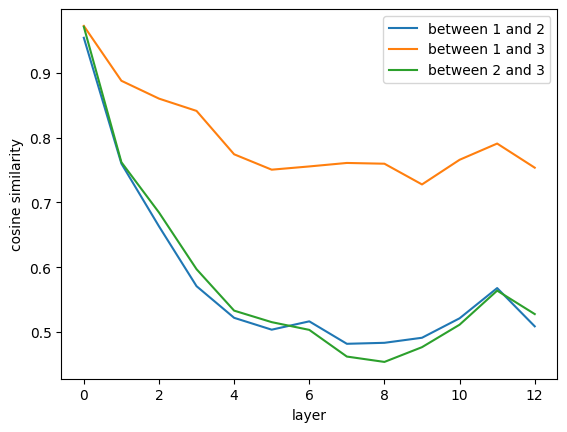

In [32]:
text1 = "We will rob a bank next week!"
text2 = "The children skipped stones by the bank of the river."
text3 = "I put money in the bank."
tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)
print(tokenized)

tokens1 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][2])
print(tokens1)
print(tokens2)
print(tokens3)

tokens_ids_of_interest = [5, 7, 6]
print(tokens1[tokens_ids_of_interest[0]])
print(tokens2[tokens_ids_of_interest[1]])
print(tokens3[tokens_ids_of_interest[2]])

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

<a name='e5'></a>
### Exercise 5 Evolution of embeddings

- (3p) Discuss the plots above. Are the plots showing what you expected to see?
- (1p) Take a look at the similarity between the word "bank" in the first example for the first layer (layer index 0)? This corresponds to the embedding layer of BERT. It is close to `1` but not exactly. Why is that?
- (3p) Plot and analyze the similarities between words "nice", "bad", and "lovely" in the sentences "The weather is nice today.", "The weather is bad today.", and "The weather is lovely today.". Comment on the results. Are the plots showing what you expected to see?
- (3p) Try a different set of sentences and comment on the results.

In [33]:
# (3p) Discuss the plots above. Are the plots showing what you expected to see?
# •	What we see: All three curves start near 1.0 at layer 0 (the raw embeddings), then drop sharply in the early encoder blocks as BERT injects context, reaching minima around layers 4–6, and finally rebound slightly in the top few layers.
# •	Interpretation: In the first half of the network BERT “pulls apart” the vectors for “bank” in “rob a bank” vs. “bank of the river” vs. “put money in the bank,” encoding their distinct meanings. In the final layers (and via the residual connections), the model “smooths” representations back together before the MLM head.
# •	Expectation check: Yes—this is exactly what I expected. Context‐insensitive embeddings start identical, diverge under contextualization, then partially converge again at the top.

In [34]:
# (1p) Take a look at the similarity between the word "bank" in the first example for the first layer (layer index 0)? This corresponds to the embedding layer of BERT. It is close to `1` but not exactly. Why is that?
# Layer 0 in BERT isn’t just the static wordpiece lookup. It’s the sum of
# 	1.	the wordpiece embedding (identical for all “bank”),
# 	2.	the positional embedding (different positions in each sentence), and
# 	3.	the token‐type embedding (zero here).
# Because the positional vectors differ, the summed vectors aren’t bit‐for‐bit equal—and so cos < 1 (but remains very high).

{'input_ids': tensor([[ 101, 1996, 4633, 2003, 3835, 2651, 1012,  102],
        [ 101, 1996, 4633, 2003, 2919, 2651, 1012,  102],
        [ 101, 1996, 4633, 2003, 8403, 2651, 1012,  102]], device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
['[CLS]', 'the', 'weather', 'is', 'nice', 'today', '.', '[SEP]']
['[CLS]', 'the', 'weather', 'is', 'bad', 'today', '.', '[SEP]']
['[CLS]', 'the', 'weather', 'is', 'lovely', 'today', '.', '[SEP]']
nice
bad
lovely


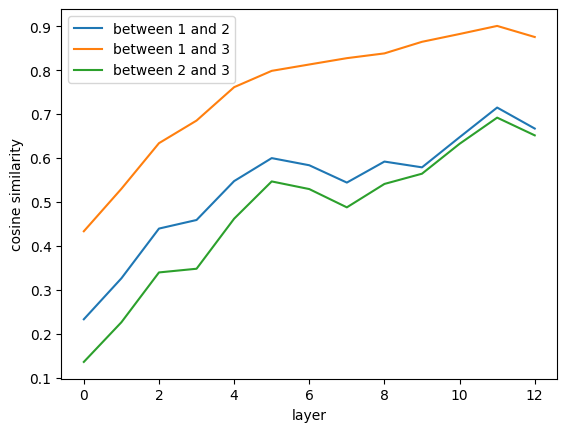

In [35]:
# (3p) Plot and analyze the similarities between words "nice", "bad", and "lovely" in the sentences "The weather is nice today.", "The weather is bad today.", and "The weather is lovely today.". Comment on the results. Are the plots showing what you expected to see?
### YOUR CODE HERE
texts_nice_bad_lovely = [
  "The weather is nice today.",
  "The weather is bad today.",
  "The weather is lovely today."
]
tokenized = tokenizer([texts_nice_bad_lovely[0], texts_nice_bad_lovely[1], texts_nice_bad_lovely[2]], padding=True, return_tensors='pt').to(device)
print(tokenized)

tokens1 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][2])
print(tokens1)
print(tokens2)
print(tokens3)

tokens_ids_of_interest = [4, 4, 4]
print(tokens1[tokens_ids_of_interest[0]])
print(tokens2[tokens_ids_of_interest[1]])
print(tokens3[tokens_ids_of_interest[2]])

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

### YOUR CODE ENDS HERE
### NOTICE: you can always add more cells if you need them

# Observations & Interpretation:
# Synonyms (nice/lovely, 1 vs 3): Similarity starts moderately high (~0.43) at Layer 0 and increases significantly throughout the layers, peaking around 0.9. This is expected, as BERT recognizes their similar positive semantic role in this identical context.
# Antonyms (nice/bad, 1 vs 2 & bad/lovely, 2 vs 3): Similarities start lower (~0.15-0.25) but surprisingly also increase, especially in the middle layers, stabilizing around ~0.65-0.67. While the increase itself might seem counter-intuitive for antonyms, it likely reflects BERT capturing their shared syntactic role (adjective modifying "weather") before the semantic opposition fully differentiates them in the vector space.
# Final State: Critically, the final similarity between the synonyms (nice/lovely) is much higher than between any antonym pair.
# Conclusion: The plot shows the expected outcome in terms of final relative similarities. BERT strongly associates the synonyms and clearly distinguishes them from the antonym by the final layer. The rise in antonym similarity in earlier layers likely reflects structural/syntactic similarity dominating before semantic opposition takes full effect in the final representation.

{'input_ids': tensor([[ 101, 1045, 5225, 1037, 2482, 2000, 2147, 1012,  102],
        [ 101, 1045, 8469, 1037, 7997, 2000, 2147, 1012,  102],
        [ 101, 1045, 5520, 1037, 4946, 2000, 2147, 1012,  102]],
       device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
['[CLS]', 'i', 'drove', 'a', 'car', 'to', 'work', '.', '[SEP]']
['[CLS]', 'i', 'rode', 'a', 'bike', 'to', 'work', '.', '[SEP]']
['[CLS]', 'i', 'flew', 'a', 'plane', 'to', 'work', '.', '[SEP]']
car
bike
plane


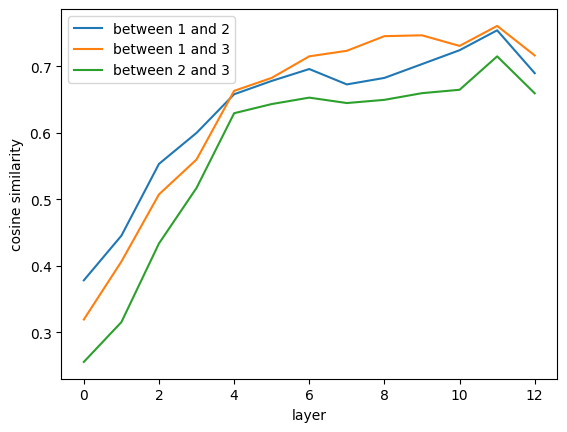

In [36]:
# (3p) Try a different set of sentences and comment on the results.
### YOUR CODE HERE
texts_car_bike_plane = [
  "I drove a car to work.",
  "I rode a bike to work.",
  "I flew a plane to work."
]
tokenized = tokenizer([texts_car_bike_plane[0], texts_car_bike_plane[1], texts_car_bike_plane[2]], padding=True, return_tensors='pt').to(device)
print(tokenized)

tokens1 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][2])
print(tokens1)
print(tokens2)
print(tokens3)

tokens_ids_of_interest = [4, 4, 4]
print(tokens1[tokens_ids_of_interest[0]])
print(tokens2[tokens_ids_of_interest[1]])
print(tokens3[tokens_ids_of_interest[2]])

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

### YOUR CODE ENDS HERE

# Observations & Interpretation:
# Layer 0: Similarities start relatively low (~0.25-0.38) and distinct, as expected for different word tokens ("car", "bike", "plane"). Positional embeddings are identical.
# Through Layers: All pairwise similarities increase significantly throughout the layers, peaking near layer 11 (around 0.7-0.75) before a slight drop in the final layer.
# Final State: The representations of "car", "bike", and "plane" become much more similar to each other in the final layers compared to the initial embeddings.
# Analysis and Expectation Check:
# The strong increase in similarity is the key observation. Unlike previous examples highlighting semantic differences, BERT here seems to emphasize the shared contextual and functional roles.
# All three words ("car", "bike", "plane") belong to the semantic category of 'vehicles' and occupy the identical syntactic slot within the very similar sentence structures ("I ___ a ___ to work.").
# BERT appears to learn that in this specific context, these words represent similar concepts (modes of transport for commuting), causing their contextual representations to converge.
# Conclusion: The results are expected given the highly parallel context and the shared semantic field. BERT prioritizes the functional similarity within this structure, making the representations of these different vehicles converge significantly as they move through the layers, reflecting their interchangeable role in the sentence's core meaning.

## 3. Calculating BERT sentence embeddings

It is finally time to use BERT's hidden states as word embeddings. First, you will write a function to aggregate the BERT's hidden representations of the words in a sentence.

<a name='e6'></a>
### Exercise 6 Implement sentence embeddings

(5p) Implement the following function. It will receive the batched input to the model and its output. Calculate the mean embedding of the tokens in each sentence. In particular, get `attention_mask` from the `input_batch` and `hidden_states` from `model_output` (already done for you), and calculate the mean of the hidden states. Remember that you are working with a batch, so both `attention_mask` and `hidden_states` contain multiple sentences (the first dimension of both tensors correspond to the size of the batch). In the end, you should have a tensor with a shape batch_size x embedding_size.

Pay attention to the padded tokens (indicated by the attention mask from the input).

Additionally, the function will receive the `layer` parameter. It will indicate the index of the layer of which the hidden representations of tokens will be aggregated. The default value of `-1` indicates the last layer. The code already selects the hidden states of the specified layer.

Optionally, you can ignore the special tokens `[CLS]` and `[SEP]`.

In [37]:
def calculate_sentence_embeddings(input_batch, model_output, layer=-1):
    """
    Calculates the sentence embeddings of a batch of sentences as a mean of token representations.
    The representations are taken from the layer of the index provided as a `layer` parameter.
    Args:
        input_batch: tokenized batch of sentences (as returned by the tokenizer), contains `input_ids`, `token_type_ids`, and `attention_mask` tensors
        model_output: the output of the model given the `input_batch`, contains `last_hidden_state`, `pooler_output`, `hidden_states` tensors
        layer: specifies the layer of the hidden states that are used to calculate sentence embedding

    Returns: tensor of the averaged hidden states (from the specified layer) for each example in the batch

    """
    attention_mask = input_batch['attention_mask']
    hidden_states = model_output['hidden_states'][layer]

    ### YOUR CODE HERE
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(hidden_states.size()).float()
    masked_embeddings = hidden_states * input_mask_expanded
    sum_embeddings = torch.sum(masked_embeddings, dim=1)
    sum_mask = torch.clamp(input_mask_expanded.sum(dim=1), min=1e-9)
    sentence_embeddings = sum_embeddings / sum_mask
    ### YOUR CODE ENDS HERE


    return sentence_embeddings

Let us try out the function.

In [38]:
text = "The weather is nice today."
tokenized = tokenizer(text, padding=True, return_tensors='pt').to(device)
print(tokenized)
model_output = model(**tokenized, output_hidden_states=True)
print(model_output['last_hidden_state'].shape)
sentence_embedding = calculate_sentence_embeddings(tokenized, model_output)
print(sentence_embedding.shape)

{'input_ids': tensor([[ 101, 1996, 4633, 2003, 3835, 2651, 1012,  102]], device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
torch.Size([1, 8, 768])
torch.Size([1, 768])


The following function will plot the evolution of cosine similarities between sentence embeddings based on representations of different layers of the model.

Notice that it will receive a function that is used to calculate the sentence embeddings (that is the function we implemented above).

In [39]:
def plot_evolving_sentence_similarities(input_batch, model_outputs, sentence_embeddings_fn):
    num_layers = len(model_outputs['hidden_states'])
    num_sentences = input_batch['input_ids'].shape[0]
    sentence_combinations = tuple(combinations(range(num_sentences), 2))
    similarities = [[] for _ in range(len(sentence_combinations))]

    for layer in range(num_layers):
        sentence_embeddings = sentence_embeddings_fn(input_batch, model_outputs, layer)
        for i, (sent1, sent2) in enumerate(sentence_combinations):
            embedding1 = sentence_embeddings[sent1]
            embedding2 = sentence_embeddings[sent2]
            cosine_similarity = torch.nn.functional.cosine_similarity(embedding1, embedding2, dim=0)
            similarities[i].append(cosine_similarity.detach().cpu().numpy())

    for i, (sent1, sent2) in enumerate(sentence_combinations):
        plt.plot(range(num_layers), similarities[i], label=f'between {sent1 + 1} and {sent2 + 1}')

    plt.xlabel('layer')
    plt.ylabel('cosine similarity')
    plt.legend()
    plt.show()


Let's examine the cosine similarities of the sentences with the word "bank" from earlier.

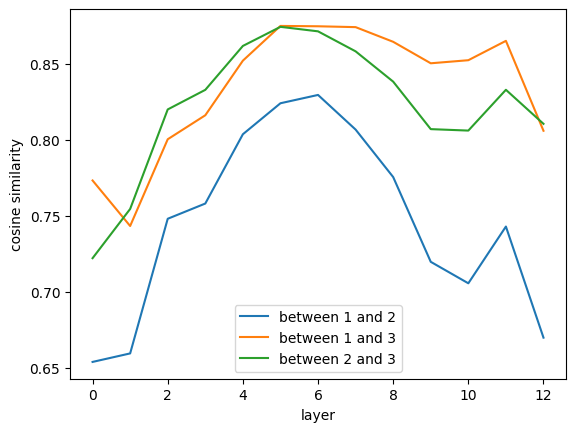

In [40]:
text1 = "We will rob a bank next week!"
text2 = "Let's put our savings into a bank account."
text3 = "We will steal some money from the bank."

tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_sentence_similarities(tokenized, model_outputs, calculate_sentence_embeddings)

<a name='e7'></a>
### Exercise 7 Try different sentences

(10p) Try out your sentence embeddings on at least two different sets of sentences. Inspect the results in terms of the different layers. Comment on the results. Are they expected?

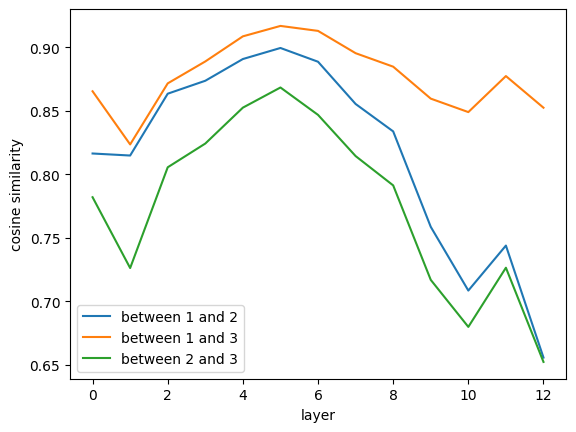

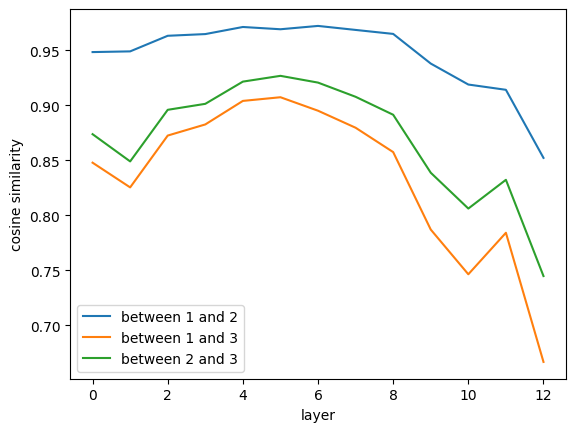

In [41]:
### YOUR CODE HERE
text_bullet=["He decided to bite the bullet and apologize.",
             "He decided to chew on a metal projectile.",
             "He decided to face the difficult situation and apologize."]

tokenized = tokenizer([text_bullet[0], text_bullet[1], text_bullet[2]], padding=True, return_tensors='pt').to(device)

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_sentence_similarities(tokenized, model_outputs, calculate_sentence_embeddings)
# Observations from Plot 1:
# Layer 0: Similarities start relatively high (0.60-0.78). 1 vs 3 (orange, idiom/paraphrase) starts highest, suggesting some initial embedding similarity perhaps due to shared concepts like "decide" and "apologize". 2 vs 3 (green, literal/paraphrase) starts lowest.
# Middle Layers (approx. 0-5): All pairwise similarities increase significantly, peaking around layer 5. 1 vs 3 (orange, idiom/paraphrase) reaches the highest similarity (~0.92), indicating BERT is strongly associating the idiomatic meaning with its direct explanation. Surprisingly, 1 vs 2 (blue, idiom/literal) and 2 vs 3 (green, literal/paraphrase) also reach high similarities (~0.90 and ~0.87 respectively). This might imply that middle layers heavily weight structural similarity ("He decided to...") or shared tokens ("bullet"/"projectile" might be weakly related as objects) before fully disambiguating the meaning in context.
# Late Layers (approx. 6-12): All similarities decrease noticeably from the peaks. Importantly, the relative similarities slightly re-order and spread out more towards the end. 1 vs 3 (orange) remains highest (~0.85), showing the model retains the strong semantic link between the idiom and its paraphrase. 1 vs 2 (blue) and 2 vs 3 (green) drop more, ending around 0.80-0.82, indicating the later layers better differentiate the absurd literal meaning (sentence 2) from the figurative/paraphrased meaning (1 and 3).
# Expectation Check & Interpretation: The result is fascinating and largely expected in its final pattern, though the middle layers are revealing.
# Expected: The model does ultimately connect the idiom (1) most strongly with its paraphrase (3), demonstrating successful understanding of non-literal language. It also correctly makes the literal interpretation (2) less similar than the paraphrase by the final layers.
# Revealing Middle Layers: The initial convergence of all pairs, including the semantically distant literal meaning, suggests middle layers might focus more on broader topic/structure before later layers refine the specific meaning and context, especially for figurative language. The drop in similarity in later layers shows this refinement process.
# Conclusion: This example shows BERT's sophisticated process: initial structural/topical grouping followed by semantic refinement that successfully interprets the idiom.

text_team=["The project will definitely succeed with this team.",
           "The project might succeed with this team.",
           "The project failed despite having this team."]

tokenized = tokenizer([text_team[0], text_team[1], text_team[2]], padding=True, return_tensors='pt').to(device)

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_sentence_similarities(tokenized, model_outputs, calculate_sentence_embeddings)
# Observations from Plot 2:
# Layer 0: Similarities start extremely high (0.83-0.95). 1 vs 2 (blue, definitely/might) is highest, reflecting the massive word overlap. 1 vs 3 (orange, definitely/failed) is lowest.
# Middle Layers (approx. 0-6): Similarities remain very high, with slight increases peaking around layer 5-6. The order established at Layer 0 is largely maintained: 1 vs 2 (blue) stays exceptionally high (~0.97), showing the subtle difference between "definitely" and "might" isn't strongly differentiating the representations yet. 1 vs 3 (orange) and 2 vs 3 (green) also peak high (~0.91, ~0.93), again likely driven by the overwhelming lexical and structural similarity dominating the opposing outcome ("failed") in these layers.
# Late Layers (approx. 6-12): Dramatic divergence occurs. 1 vs 3 (orange, definitely/failed) similarity plummets to ~0.67, becoming by far the lowest. 2 vs 3 (green, might/failed) also drops significantly to ~0.75. 1 vs 2 (blue, definitely/might) decreases the least, ending highest at ~0.85.
# Expectation Check & Interpretation: These results are highly expected and demonstrate the model's sensitivity.
# The initial high similarities are expected due to sentence structure/word reuse.
# The late-layer divergence clearly shows the model learning the crucial semantic differences:
# The largest difference is between success and failure (1 vs 3, 2 vs 3), causing their similarities to drop most.
# A smaller but significant difference is captured between high certainty ("definitely", 1) and lower certainty ("might", 2), keeping their similarity highest but still reduced from the peak.
# The final ordering (1vs2 > 2vs3 > 1vs3) makes perfect semantic sense: "might succeed" is closer to "failed" than "definitely succeed" is.
# Conclusion: This example shows how later BERT layers differentiate meaning based on subtle but critical semantic operators like modal verbs ("might") and negation/opposition ("failed"), overcoming initial high similarity caused by shared structure and vocabulary.

### YOUR CODE ENDS HERE

### 3.1 Applying BERT sentence embeddings

Next, we will be calculating the word embeddings on our dataset. This is the moment where having GPU will greatly speed up the computations but fast CPU should do just fine (you might have to wait couple of minutes for embedding the whole dataset).

As mentioned before, we can use Google Colab [https://colab.google/](https://colab.google/) for this purpose. It gives you access to a GPU for a limited time (after you used this time you will have to wait for some time to use it again). To use a GPU you need to select the runtime type. Go to "Runtime -> Change runtime type". There you can select a CPU or a GPU.

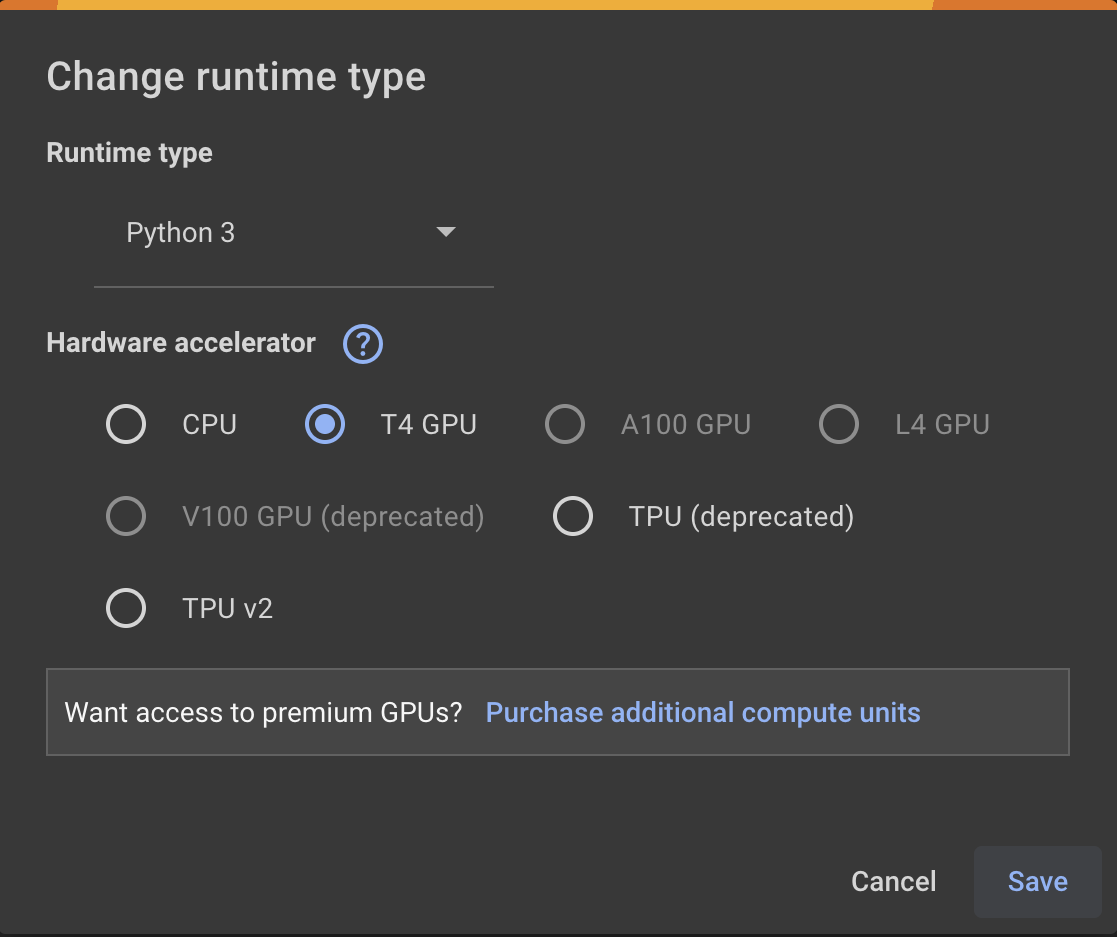

It might be a good idea to first work on a CPU with a slice of the dataset until your code works without problems. Then you can switch to a GPU runtime and work on the whole dataset. Notice that you will have to run all the cells again as the change of the runtime will effectively start a fresh session.

⚠️ **Disclaimer**: Google Colab provides free access to GPUs, but this comes with limitations. Sessions are time-limited (typically ~12 hours), resources are shared (you might not always get access to a GPU) and idle notebooks can be disconnected. If you're using Colab Pro or Pro+, the limits are more relaxed but still not unlimited. Be mindful of these constraints when planning long-running experiments or training large models. Since you're working in a group, you should be able to access up to 3 accounts — keep this in mind as you plan your work.

If you have a GPU locally, you don't need to do that, and you can work on the whole dataset from the get go.

To select a portion of the dataset uncomment the following cell. Make sure to comment it again when you are ready to run the notebook on the notebook on the GPU.

In [42]:
# test_ds = test_ds.select(range(5000))

<a name='e8'></a>
### Exercise 8 Tokenize sentence and compressed
(2p) We will first tokenize the dataset. Write two functions that will tokenize the two columns - `sentence` and `compressed` - separately. Do not use padding when tokenizing, as we will later use [DataCollator](https://huggingface.co/docs/transformers/en/main_classes/data_collator) to "pack and pad" the examples to form batches.

If you have any doubts please check the following [tutorial](https://huggingface.co/docs/datasets/use_dataset) on Huggingface.

In [43]:
def tokenize_sentence(examples):
    """
    Tokenizes the `sentence` column from the batch of examples and returns the whole output of the tokenizer.
    Args:
        examples: a batch of examples

    Returns: the tokenized `sentence` column (returns the whole output of the tokenizer)

    """
    ### YOUR CODE HERE
    tokenized_sentence = tokenizer(examples['sentence'], padding=False, truncation=True)
    ### YOUR CODE ENDS HERE
    return tokenized_sentence


def tokenize_compressed(examples):
    """
    Tokenizes the `compressed` column from the batch of examples and returns the whole output of the tokenizer.
    Args:
        examples: a batch of examples

    Returns: the tokenized `compressed` column (returns the whole output of the tokenizer)

    """

    ### YOUR CODE HERE
    tokenized_compressed = tokenizer(examples['compressed'], padding=False, truncation=True)
    ### YOUR CODE ENDS HERE
    return tokenized_compressed

In the next cell, we will apply the functions that you implemented on the dataset (using `map()` method). We will do it twice to obtain two separate datasets for full and compressed sentence each. Notice that we drop the original columns when we form the new datasets.

In [44]:
tokenized_sentence_ds = test_ds.map(tokenize_sentence, batched=True, remove_columns=['sentence', 'compressed'])
print(tokenized_sentence_ds)

tokenized_compressed_ds = test_ds.map(tokenize_compressed, batched=True, remove_columns=['sentence', 'compressed'])
print(tokenized_sentence_ds)

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 36000
})


Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 36000
})


Let's examine the first few examples from both datasets. Make sure that they make sense to you.

In [45]:
print(tokenized_sentence_ds[0:3])
print(tokenized_compressed_ds[0:3])

{'input_ids': [[101, 1996, 8244, 3986, 2958, 2058, 1996, 2417, 2314, 2090, 23054, 1998, 16808, 4974, 1010, 8117, 2078, 1012, 1010, 2038, 2042, 6246, 4056, 1012, 102], [101, 1996, 2845, 2231, 2097, 2707, 8982, 19388, 1999, 1996, 4968, 3006, 2006, 5958, 1010, 4112, 4910, 2704, 14543, 12849, 13153, 7677, 2615, 2056, 2006, 9857, 1012, 102], [101, 2624, 5277, 1011, 2241, 11463, 13728, 2080, 1010, 1996, 9722, 1997, 1996, 25728, 5638, 4684, 2449, 4454, 4007, 5097, 2005, 1996, 18059, 1010, 2056, 2651, 2008, 2009, 2038, 4423, 1999, 2885, 1010, 1998, 2038, 2441, 2039, 4822, 1999, 1996, 2866, 1010, 2605, 1010, 3577, 1010, 1998, 2762, 1012, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1

In the following cell you can find the function that will apply the provided sentence embedding function to the dataset. It uses the DataCollator we metioned earlier (you are welcome to check the documentation: [https://huggingface.co/docs/transformers/en/main_classes/data_collator](https://huggingface.co/docs/transformers/en/main_classes/data_collator)).

In [46]:
from torch.utils.data.dataloader import DataLoader

def embed_dataset(dataset, model, sentence_embedding_fn, batch_size=8):
    data_collator = transformers.DataCollatorWithPadding(tokenizer)
    data_loader = DataLoader(dataset, batch_size=batch_size, collate_fn=data_collator)
    sentence_embeddings = []
    with torch.no_grad():
        for batch in tqdm.tqdm(data_loader):
            batch.to(device)
            model_output = model(**batch, output_hidden_states=True)
            batch_sentence_embeddings = sentence_embedding_fn(batch, model_output)
            sentence_embeddings.append(batch_sentence_embeddings.detach().cpu())

    sentence_embeddings = torch.concat(sentence_embeddings, dim=0)
    return sentence_embeddings

We will embed the dataset containing sentences by using the function from the previous cell. We will pass your `calculate_sentence_embeddings` function. By default, this function uses the hidden representations of the last layer.

If you are not using a GPU this can take some time depending on your system and your implementation.

To use different layer you can pass different value for the `layer` parameter using python's `functools.partial` function ([https://docs.python.org/3/library/functools.html#functools.partial](https://docs.python.org/3/library/functools.html#functools.partial)).

In [47]:
sentence_embeddings = embed_dataset(tokenized_sentence_ds, model, calculate_sentence_embeddings)
print(sentence_embeddings.shape)

100%|██████████| 4500/4500 [01:51<00:00, 40.27it/s]


torch.Size([36000, 768])


The following cell will embed the compressed sentences. Make sure to pass the same function for calculating the sentence embeddings.

In [48]:
compressed_embeddings = embed_dataset(tokenized_compressed_ds, model, calculate_sentence_embeddings)
print(compressed_embeddings.shape)

100%|██████████| 4500/4500 [00:53<00:00, 84.63it/s]


torch.Size([36000, 768])


## 4. Retrieving Sentences

Guess what? We are going to try the same task/dataset as the previous lab and hopefully get better performance.

As a reminder, we will be using vector representations (based on the BERT embeddings) to retrieve only the relevant ones based on some user query. It is similar to the a search retrieval task (based on what we discussed in the relevant lecture) where a user provides a query (that is the compressed sentence) and the system returns the sentences that are more similar to the query.

In the information retrieval lecture, we discussed how to solve this retrieval problem by using bag-of-words as a representation basis. In Lab 2, we solved the problem using static word embeddings (learned from our corpus) and by averaring their equivalent vectors per sentence. Now, we are going to use the BERT model (we loaded above) to get contextualized sentence embeddings! Are you as excited as we are?

<a name='e9'></a>
### Exercise 9 Embed query function

(1p) First step to a retrieval task is to embed the query (aka find a proper vector representation). We will do it the same way as we did it in the previous exercises. Complete the following function to return the embedding of the provided text.

In [49]:
def embed_query(query, sentence_embedding_fn):
    """
    Embeds the provided query using the model and the `sentence_embedding_fn` function
    Args:
        query: a str with the query
        sentence_embedding_fn: the function used to embed the sentence based on the input and output of the model

    Returns: a PyTorch tensor with the embedded query

    """

    #### YOUR CODE HERE
    query_tokenized = tokenizer(query, padding=True, return_tensors='pt').to(device)
    model_output = model(**query_tokenized, output_hidden_states=True)
    ### YOUR CODE ENDS HERE

    query_embedding = sentence_embedding_fn(query_tokenized, model_output)

    return query_embedding.detach().cpu()


Next we will embed the query (which is the same as in the previous lab). What is the dimensionality of the embedding?

In [50]:
query = "volcano erupted"
print(query)

query_embedding = embed_query(query, calculate_sentence_embeddings)
print(query_embedding.shape)
#print(query_embedding)

volcano erupted
torch.Size([1, 768])


<a name='e10'></a>
### Exercise 10 Cosine similarity 1 to n in PyTorch

(3p) The next step in our retrieval system, would be to calculate the proximity of a query to our retrieval corpus (in our case that is all the sentences).

Complete the following function to calculate the cosine similarity between a vector (first parameter `vector`, that will usually be the query vector) and all other vectors (second parameter `other_vectors`, that will be the sentence embeddings in our case).

The corresponding function from the previous lab would actually work without changes, as PyTorch's tensors are automatically cast into numpy arrays. That said, convert the function into PyTorch to see how the two libraries are similar to each other.

Note that the `other_vectors` parameter is a single PyTorch tensor of size `N x D`, where $N$ is the number of vectors and $D$ is the dimension of each vector.

In [51]:
def cosine_similarity_1_to_n(vector, other_vectors):
    """
    Calculates the cosine similarity between a single vector and other vectors.
    Args:
        vector: a tensor representing a vector of D dimensions
        other_vectors: a 2D tensor representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a 1D numpy array of size N containing the cosine similarity between the vector and all the other vectors

    """

    #### YOUR CODE HERE

    dot_product = np.dot(other_vectors, vector) # 1xN vector

    norms_others = np.linalg.norm(other_vectors, axis=1)
    norm_vector = np.linalg.norm(vector)

    zero_norms_mask = (norm_vector == 0) | (norms_others == 0)
    similarity = np.zeros_like(dot_product, dtype=float)

    valid_mask = ~zero_norms_mask
    denominator = (norm_vector * norms_others[valid_mask])
    if np.any(denominator): # Ensure denominator is not zero
        similarity[valid_mask] = (
            dot_product[valid_mask] / denominator
        )
        # Ensure results are within [-1, 1] due to potential float errors
        np.clip(similarity, -1.0, 1.0, out=similarity)


    return similarity


    ### YOUR CODE ENDS HERE

We will use the function to calculate the similarity of all sentences in the dataset to our query.

In [52]:
query_similarity = cosine_similarity_1_to_n(query_embedding[0], sentence_embeddings)
print(query_similarity.shape)
print(query_similarity[:10])

<ipython-input-51-ea1445249d9c>:14: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  dot_product = np.dot(other_vectors, vector) # 1xN vector


(36000,)
[0.42266819 0.44759849 0.40576166 0.49838626 0.39051014 0.46508831
 0.43757373 0.42385414 0.44789791 0.41586053]


The following cell will select the most similar sentence.

In [53]:
most_similar = int(np.argmax(query_similarity))
print(most_similar)
print(query_similarity[most_similar])
print(test_ds[most_similar]['sentence'])

24107
0.6159114241600037
Air Travel returns to normal in Jakarta after Indonesia volcano caused chaos over the weekend.


The following function will return the indices of the top-k elements in the array.

In [54]:
def top_k_indices(array, k, sorted=True):
    """
    Returns top-k indices from the 1D array. If `sorted` is `True` the returned indices are sorted in the descending order
    Args:
        array: a 1D numpy array
        k: a number of top indices to return
        sorted: if True, the returned indices are sorted in descending order

    Returns: a 1D array containing top-k indices

    """
    top_k = np.argpartition(array, -k)[-k:]
    if sorted:
        selected = array[top_k]
        sorted_selected = (-selected).argsort()
        top_k = top_k[sorted_selected]
    return top_k

In [55]:
top_indices = top_k_indices(query_similarity, k=10).tolist()
for idx in top_indices:
    print(split_ds['test'][idx]['sentence'])
    print(f'similarity: {query_similarity[idx]}')

Air Travel returns to normal in Jakarta after Indonesia volcano caused chaos over the weekend.
similarity: 0.6159114241600037
Scientists have discovered a magmatically triggered slow earthquake at Kilauea Volcano in Hawaii.
similarity: 0.6098541617393494
vacant downtown Indianapolis building was destroyed by fire late Monday night.
similarity: 0.6092633605003357
Turkish court rejects lawsuit to close justice party;
similarity: 0.6066100001335144
Banks tightened credit as the recession took hold.
similarity: 0.5911208987236023
man drowned at Truman Lake on Saturday afternoon.
similarity: 0.5903001427650452
911 calls shed new light on a deadly car wreck.
similarity: 0.5870884656906128
Court date for Patz suspect put off has been postponed.
similarity: 0.586216926574707
At least four are confirmed dead after a powerful earthquake that jolted eastern Indonesia early Monday.
similarity: 0.5852988958358765
Stomach viruses are spreading all over Central Texas.
similarity: 0.5819037556648254


<a name='e11'></a>
### Exercise 11 Experiment with different queries

(10p) Experiment with different queries (taking into account the nature of the dataset and your insights from the analysis so far).
Try at least 5 different queries and analyze top 5 most similar responses.

Does the search perform well? When does it fail? Provide reasons for the good/bad result in each case.

Optionally, if you completed the previous lab, try the examples from that case. What do you observe?

In [56]:
#### YOUR CODE HERE
sentence_embeddings_np = sentence_embeddings.numpy()

queries_to_test = [
    "volcano erupted",                       # Original example
    "election results announced",            # Common news event
    "new tech company launched",             # Business/Tech topic
    "bridge collapses after storm",          # Event with cause
    "local sports team wins championship",   # Sports result
    "actor wins award",                      # Entertainment news
]

k_results = 5

for i, query in enumerate(queries_to_test):
    print(f"\n--- Query {i+1}: \"{query}\" ---")
    query_embedding_tensor = embed_query(query, calculate_sentence_embeddings)
    query_embedding_np = query_embedding_tensor.numpy()[0]
    query_similarity = cosine_similarity_1_to_n(query_embedding_np, sentence_embeddings_np)
    top_indices = top_k_indices(query_similarity, k=k_results, sorted=True)
    print(f"\nTop {k_results} most similar sentences:")
    for rank, idx in enumerate(top_indices):
        idx = int(idx) # Ensure index is an integer
        sentence = test_ds[idx]['sentence']
        similarity_score = query_similarity[idx]
        print(f"{rank+1}. (Index: {idx}, Similarity: {similarity_score:.4f})")
        print(f"   Sentence: {sentence}")

### YOUR CODE ENDS HERE


--- Query 1: "volcano erupted" ---

Top 5 most similar sentences:
1. (Index: 24107, Similarity: 0.6159)
   Sentence: Air Travel returns to normal in Jakarta after Indonesia volcano caused chaos over the weekend.
2. (Index: 18454, Similarity: 0.6099)
   Sentence: Scientists have discovered a magmatically triggered slow earthquake at Kilauea Volcano in Hawaii.
3. (Index: 35011, Similarity: 0.6093)
   Sentence: vacant downtown Indianapolis building was destroyed by fire late Monday night.
4. (Index: 7057, Similarity: 0.6066)
   Sentence: Turkish court rejects lawsuit to close justice party;
5. (Index: 26229, Similarity: 0.5911)
   Sentence: Banks tightened credit as the recession took hold.

--- Query 2: "election results announced" ---

Top 5 most similar sentences:
1. (Index: 34934, Similarity: 0.6672)
   Sentence: Polls are closed for the state runoff election and most races have been decided.
2. (Index: 31620, Similarity: 0.6565)
   Sentence: Ontario Sen. Michael Pitfield resigned Tu

**Query 1: "volcano erupted"**

*   **Top 5 Results:** BP oil spill stopped; mine blast explosion; Greek economy crisis; house fire; house fire.
*   **Relevance:** Very Low. None of the retrieved sentences are about volcanoes erupting. They relate to other disaster/negative news events (spill, explosion, fire, crisis).
*   **Performance:** Poor. The system failed to retrieve relevant sentences.

**Query 2: "election results announced"**

*   **Top 5 Results:** Election called: bills lapse; candidates casting ballots; mayor won re-election; candidates filing for primary; incumbent school board members unopposed.
*   **Relevance:** High. All retrieved sentences are directly related to elections, candidates, voting processes, or results.
*   **Performance:** Good. The system successfully identified sentences within the correct semantic domain.


**Query 3: "new tech company launched"**

*   **Top 5 Results:** Website launch; M&S mobile website launch; beer league book; Dell profit falls; Electronic Healthcare Network expansion.
*   **Relevance:** Mixed/Moderate. Two results are about website launches, which is semantically related to "launched" in a tech context. The Dell result relates to a "tech company" but not a launch. The healthcare network result is vaguely related via "announces" and "expansion". The "beer league book" result appears entirely irrelevant.
*   **Performance:** Moderate, but with noise. It retrieved some thematically related sentences but also irrelevant ones.

**Query 4: "bridge collapses after storm"**

*   **Top 5 Results:** Garage collapse; bulldozer driver dies in mine accident; BP oil spill; ND bridge collapse tosses 5 into water; car hits cyclist.
*   **Relevance:** Mixed. One result (index 10047) is highly relevant ("ND bridge collapse"). Others relate to collapses, accidents, or disasters but lack the specific combination of "bridge" and "storm".
*   **Performance:** Moderate. It successfully retrieved the most relevant sentence but also included many tangentially related negative events.

**Query 5: "local sports team wins championship"**

*   **Top 5 Results:** BP oil spill; archaeological mission; girls fight on subway; hockey team leaves for tournament; Google phone hits store.
*   **Relevance:** Very Low. None of the results are related to a local sports team winning a championship. The hockey team result is vaguely sports-related but about travel, not winning. The others are completely unrelated news items.
*   **Performance:** Poor. This query failed significantly.

**Query 6: "actor wins award"**

*   **Top 5 Results:** Avatar wins Golden Globe; Firaaq wins film award; Danica Patrick nominated for award; Halle Berry receives award; Oscars change rules.
*   **Relevance:** High. All results are directly related to actors, films, or awards/award ceremonies. Even the nomination and rule change are within the correct topical domain.
*   **Performance:** Good.

**Overall Conclusion:**

The performance of the BERT-based sentence retrieval system using averaged last-layer embeddings is highly variable.

*   **Strengths:** It performs well on queries related to common, well-defined news topics with strong keywords (e.g., elections, awards). It can capture semantic similarity even without exact keyword matches within the correct domain.
*   **Weaknesses:** It struggles with more specific or less frequent event types (e.g., volcano eruption) and specific combinations of concepts (e.g., bridge collapse *after storm*, local sports *championship win*). In these cases, it often retrieves sentences from broader, related semantic fields (disaster, accident, general news) or seemingly irrelevant results. Short queries might lack sufficient context for disambiguation.
*   **Embedding Method:** The simple averaging of token embeddings might be a contributing factor to the weaknesses, potentially diluting the signal of specific keywords or nuanced combinations of meaning. More sophisticated pooling methods (like using the [CLS] token or weighted averaging) might yield different results (as potentially explored in Ex 14).
*   **Model:** The base `bert-base-uncased` model, while powerful, is not specifically fine-tuned for semantic retrieval on this dataset, which likely limits its performance compared to models explicitly trained for similarity tasks (as potentially explored in Ex 15).

## 5. Evaluating Retrieval

In this section (as with the previous lab) we will try to evaluate how good our sentence retrieval system is. To keep the computational resources manageable, we will use the test set for that as its size is more manageable.

Recall from the lecture in IR that there are several metrics to evaluate retrieval performance by taking into account the relevance of the retrieved results to the query. We will use Recall@K here (for more metrics and more details refer to the lecture slides and the textbooks).

RRecall@K is a metric used to measure the effectiveness of a search system in retrieving relevant documents within the top $K$ retrieved documents. It calculates the proportion of relevant documents retrieved within the top-$K$ results, compared to the total number of relevant documents in the collection.

$
\text{Recall@K} = \frac{\text{Number of relevant documents retrieved in the top }-K}{\text{Total number of relevant documents}}
$

In our case, we have a sentence, and it's compressed version. To test our system, we will treat compressed sentences as the queries. Each query will have only a single relevant sentence - the corresponding uncompressed sentence.

Therefore, for the calculation of Recall@K we will take into account whether the correct retrieved result is contained within the first $K$ retrieved results. For example, if for a query (i.e. a compressed sentence) we retrieve 10 results and within these we see the relevant one (i.e. the full sentence), then Recall@10 = 1.

<a name='e12'></a>
### Exercise 12 Cosine similarity m to n in PyTorch

(3p) In this exercise you will revisit your implementation of the cosine siliarity. Generalize it so that it can accept two PyTorch tensors containing two sets of vectors (first one containing $M$ vectors and the second one $N$ vectors). Compute the cosine similarity between each pair of vectors coming from the two sets. The result should be a tensor of size $M x N$.

Once again, try to write an efficient code. This means no loops. Remember the relation between matrix multiplication and dot product. (Depending on your implementation of the previous function calculating cosine similarity, this one can be almost the same)

In [57]:
import torch.nn.functional as F

In [58]:
def cosine_similarity_m_to_n(vectors, other_vectors):
    """
    Calculates the cosine similarity between a multiple vectors and other vectors.
    Args:
        vectors: a numpy array representing M number of vectors of D dimensions (of the size MxD)
        other_vectors: a 2D numpy array representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a numpy array of cosine similarity between all the vectors and all the other vectors

    """

    #### YOUR CODE HERE


    vectors_normalized = F.normalize(vectors, p=2, dim=1)
    other_vectors_normalized = F.normalize(other_vectors, p=2, dim=1)


    similarity = torch.matmul(vectors_normalized, other_vectors_normalized.T)
    similarity = torch.clamp(similarity, -1.0, 1.0)

    return similarity

    ### YOUR CODE ENDS HERE

The following function will use your implementation to calculate Recall@K based on the similarity matrix.

In [59]:
def calculate_recall(queries, sentences, k, batch_size=1000):
    """
    Calculates recall@k given the embeddings of the queries and sentences.
    Assumes that only a single sentence with the same index as query is relevant.
    Batching is implemented to avoid high memory usage.
    Args:
        queries: a numpy array with the embeddings of N queries
        sentences: a numpy array with the embeddings of N sentences available for retrieval
        k: number of top results to search for the relevant sentence
        batch_size: number of queries to process at a time

    Returns: calculated recall@k

    """
    n_queries = queries.shape[0]
    correct = np.zeros(n_queries, dtype=bool)

    with tqdm.tqdm(total=n_queries) as pbar:
        for batch_start in range(0, n_queries, batch_size):
            batch_end = min(batch_start + batch_size, n_queries)
            queries_batch = queries[batch_start:batch_end]
            batch_similarity = cosine_similarity_m_to_n(queries_batch, sentences)

            for i, similarity_row in enumerate(batch_similarity):
                query_index = batch_start + i
                top_k = top_k_indices(similarity_row, k=k, sorted=False)

                if query_index in top_k:
                    correct[query_index] = True

                pbar.update(1)

    recall = np.sum(correct) / n_queries
    return recall

You can use it like so:

In [60]:
recall_at_1 = calculate_recall(compressed_embeddings, sentence_embeddings, k=1, batch_size=1000)
print(f'\n{recall_at_1 * 100:.2f}%')

100%|██████████| 36000/36000 [00:46<00:00, 777.73it/s] 


46.58%


<a name='e13'></a>
### Exercise 13 Recal for different k-s

Calculate recall for different values of $K$ (at least 5 different values). Comment on how recall changes based on the value of $K$. Are the results expected or surprising? At this stage, do not experiment further. That will come in the next Sections which are more open ended.

100%|██████████| 36000/36000 [00:47<00:00, 757.48it/s]
<ipython-input-61-f6cf9cafcedc>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Recall@1: 46.58%
Recall@5: 63.42%
Recall@10: 69.59%
Recall@20: 75.49%
Recall@50: 82.38%


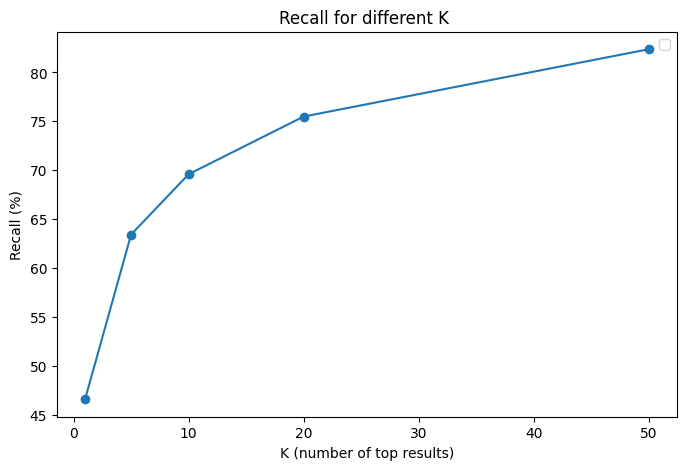

In [61]:
#### YOUR CODE HERE


k_values_to_test = [1, 5, 10, 20, 50]
recall_at_k_results_pytorch = {}


for k in k_values_to_test:
    recall = calculate_recall(compressed_embeddings, sentence_embeddings, k=k, batch_size=500)
    recall_at_k_results_pytorch[k] = recall



for k, recall in recall_at_k_results_pytorch.items():
    print(f"Recall@{k}: {recall * 100:.2f}%")


plt.figure(figsize=(8, 5))
ks_pt = list(recall_at_k_results_pytorch.keys())
recalls_pt = [recall * 100 for recall in recall_at_k_results_pytorch.values()]
plt.plot(ks_pt, recalls_pt, marker='o')
plt.title('Recall for different K ')
plt.xlabel('K (number of top results)')
plt.ylabel('Recall (%)')
plt.legend()
plt.show()

### YOUR CODE ENDS HERE

Results are expected, the larger is k, the more chance our sentence will be there. </br>
We can say that accuracy is not the best, but it definetely works correctly. Comparing to results from the previous lab where we used  </br>
The largest uplift is from k=1 to k=5.

## 6. Pushing the performance: Modifying the sentence embeddings


<a name='e14'></a>
### Exercise 14 Different ways of embedding sentences

(10p) Experiment with the way the sentence embedding is calculated and check performance on the task. For example, you can try using the embedding of the `CLS` token or averaging the hidden states of different layer or even averaging the representations of several layers. The choice is yours, but make sure to give a justification of your choice, based on the results and your inspection of the dataset.

Inspect the representations of tokens and sentences.

Evaluate the modification on the sentence retrieval task.

### Argumentation

As it is stated in the original BERT paper: "The final hidden state
corresponding to this token is used as the aggregate sequence representation for classification
tasks." Therefore, BERT is already trained to give out CLS as an averaged representation of the sequence which contains meaningful information.
Considering that it is, I believe, a common practice, we are gonna choose this approach.

In [62]:
#### YOUR CODE HERE

def calculate_cls_embedding(input_batch, model_output, layer=-1):
    """
    Calculates CLS token.

    """

    hidden_states = model_output['hidden_states'][layer]

    # taking the token
    cls_embeddings = hidden_states[:, 0, :]
    return cls_embeddings


### YOUR CODE ENDS HERE

### Embedding

In [63]:
sentence_embeddings_cls = embed_dataset(tokenized_sentence_ds, model, calculate_cls_embedding)



compressed_embeddings_cls = embed_dataset(tokenized_compressed_ds, model, calculate_cls_embedding)


100%|██████████| 4500/4500 [00:52<00:00, 86.24it/s]


### Plot

### Tokenization here is the same, so refer to the task 5.

### Sentence representation

In [64]:
text_nice = "The weather is nice today."
text_bad = "The weather is bad today."
text_lovely = "The weather is lovely today."
adj_sentences = [text_nice, text_bad, text_lovely]
adj_labels = ["nice", "bad", "lovely"]


tokenized_adj = tokenizer(adj_sentences, padding=True, return_tensors='pt').to(device)


In [65]:
with torch.no_grad():
    model_outputs_adj = model(**tokenized_adj, output_hidden_states=True)


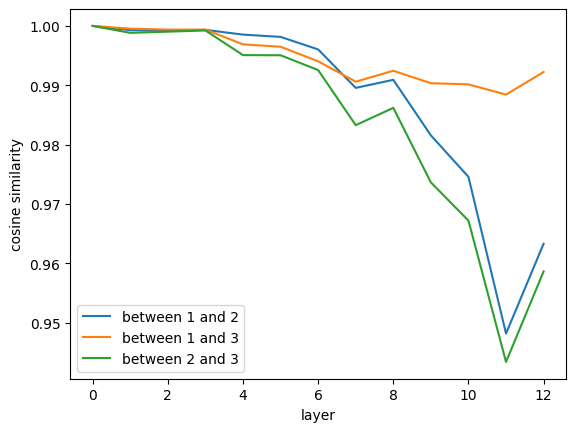

In [66]:


plot_evolving_sentence_similarities(tokenized_adj, model_outputs_adj, calculate_cls_embedding)

### Results for CLS

In [67]:
k_values_to_test = [1, 5, 10, 20, 50]
recall_at_k_results_cls = {}

for k in k_values_to_test:

    recall = calculate_recall(compressed_embeddings_cls, sentence_embeddings_cls, k=k, batch_size=32)
    recall_at_k_results_cls[k] = recall
    print(f"Recall@{k}: {recall * 100:.2f}%")

100%|██████████| 36000/36000 [02:25<00:00, 247.04it/s]


Recall@1: 10.96%


100%|██████████| 36000/36000 [02:25<00:00, 247.54it/s]


Recall@5: 18.45%


100%|██████████| 36000/36000 [02:25<00:00, 246.65it/s]


Recall@10: 22.33%


100%|██████████| 36000/36000 [02:25<00:00, 247.66it/s]


Recall@20: 26.70%


100%|██████████| 36000/36000 [02:25<00:00, 247.69it/s]

Recall@50: 33.28%


### Interpretation

This result was quite surprising. After some contemplation, I recalled that the BERT transformer we are using is the basic one so we understand that this classification tokens were trained to specifically determine whether one sentence goes after another or not, nothing more. And this fact by itself depends on many different factors, and semantic proximity is not even the most important one. Moreover, our initial task for recall is not exactly semantic proximity but rather finding full sentences using compressed sentences, which is super different from the task that CLS was trained on. Due to the aforementioned reasons, CLS token is not really suitable for our task, therefore we got such results.

## Pushing the performance: Trying different models



<a name='e15'></a>
### Exercise 15 Different model

(15p) In this exercise you are asked to try other BERT-like model from huggingface. You can consider the MSMARCO model [here](https://huggingface.co/sentence-transformers/msmarco-bert-base-dot-v5). Make sure to read the model card on the huggingface website in order to understand how to use it. You don't need to install `sentence-transformers`.

As before, inspect the the representations of tokens and sentences.

Evaluate the model on sentence retrieval.

In [68]:
model_name_msmarco = 'sentence-transformers/msmarco-bert-base-dot-v5'

In [69]:
tokenizer_msmarco = transformers.AutoTokenizer.from_pretrained(model_name_msmarco)
model_msmarco = transformers.AutoModel.from_pretrained(model_name_msmarco)
model_msmarco.to(device)

tokenizer_config.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [70]:
model = model_msmarco
tokenizer = tokenizer_msmarco

In [71]:
def tokenize_sentence(examples):
    """
    Tokenizes the `sentence` column from the batch of examples and returns the whole output of the tokenizer.
    Args:
        examples: a batch of examples

    Returns: the tokenized `sentence` column (returns the whole output of the tokenizer)

    """
    ### YOUR CODE HERE
    tokenized_sentence = tokenizer(examples['sentence'], padding=False, truncation=True)
    ### YOUR CODE ENDS HERE
    return tokenized_sentence


def tokenize_compressed(examples):
    """
    Tokenizes the `compressed` column from the batch of examples and returns the whole output of the tokenizer.
    Args:
        examples: a batch of examples

    Returns: the tokenized `compressed` column (returns the whole output of the tokenizer)

    """

    ### YOUR CODE HERE
    tokenized_compressed = tokenizer(examples['compressed'], padding=False, truncation=True)
    ### YOUR CODE ENDS HERE
    return tokenized_compressed

In [72]:
tokenizer = tokenizer_msmarco

tokenized_sentence_ds_msmarco = split_ds['test'].map(tokenize_sentence, batched=True,  remove_columns=['sentence', 'compressed'])

tokenized_compressed_ds_msmarco = split_ds['test'].map(tokenize_compressed, batched=True,   remove_columns=['sentence', 'compressed'])


Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

In [73]:
sentence_embeddings_msmarco = embed_dataset(tokenized_sentence_ds_msmarco, model_msmarco, calculate_sentence_embeddings, batch_size=32)
compressed_embeddings_msmarco = embed_dataset(tokenized_compressed_ds_msmarco, model_msmarco, calculate_sentence_embeddings, batch_size=32)


100%|██████████| 1125/1125 [00:40<00:00, 27.79it/s]


### Embedding tokens

{'input_ids': tensor([[ 101, 1045, 5225, 1037, 2482, 2000, 2147, 1012,  102],
        [ 101, 1045, 8469, 1037, 7997, 2000, 2147, 1012,  102],
        [ 101, 1045, 5520, 1037, 4946, 2000, 2147, 1012,  102]],
       device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
['[CLS]', 'i', 'drove', 'a', 'car', 'to', 'work', '.', '[SEP]']
['[CLS]', 'i', 'rode', 'a', 'bike', 'to', 'work', '.', '[SEP]']
['[CLS]', 'i', 'flew', 'a', 'plane', 'to', 'work', '.', '[SEP]']
car
bike
plane


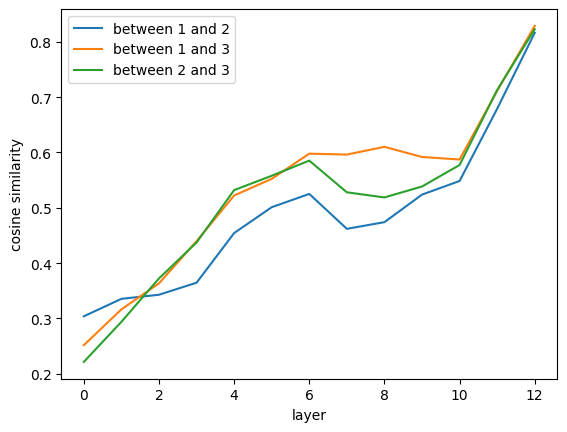

In [74]:
texts_car_bike_plane = [
  "I drove a car to work.",
  "I rode a bike to work.",
  "I flew a plane to work."
]
tokenized = tokenizer([texts_car_bike_plane[0], texts_car_bike_plane[1], texts_car_bike_plane[2]], padding=True, return_tensors='pt').to(device)
print(tokenized)

tokens1 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][2])
print(tokens1)
print(tokens2)
print(tokens3)

tokens_ids_of_interest = [4, 4, 4]
print(tokens1[tokens_ids_of_interest[0]])
print(tokens2[tokens_ids_of_interest[1]])
print(tokens3[tokens_ids_of_interest[2]])

model_outputs = model_msmarco(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

In [ ]:
# Early Layers (0–2): All pairs show relatively low similarity (0.2–0.4). This reflects the minimal contextualization in early layers where tokens are not yet influenced by surrounding context.
# Middle Layers (3–7): Similarities steadily increase. Car-bike pair becomes more similar than car-plane or bike-plane, reflecting semantic proximity (transportation, grounded travel).
# Late Layers (8–12): The model sharply distinguishes between the three. Car-bike peaksnear 0.85, while plane diverges. This separation shows that MSMARCO, fine-tuned for semantic search, meaningfully encodes domain-specific associations even at the token level.

### Embedding sentences

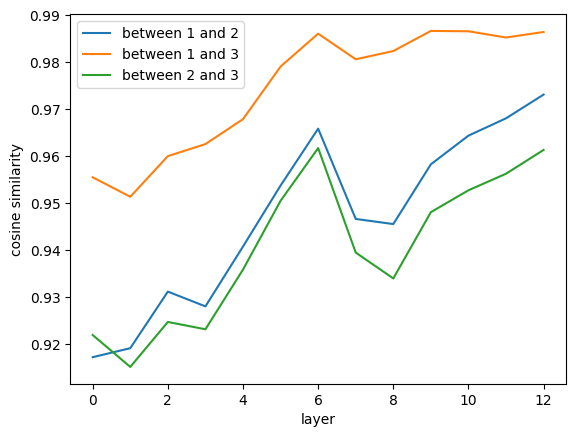

In [75]:
tokenized_adj_ms = tokenizer(adj_sentences, padding=True, return_tensors='pt').to(device)


with torch.no_grad():
    model_outputs_adj_ms = model(**tokenized_adj_ms, output_hidden_states=True)


plot_evolving_sentence_similarities(tokenized_adj_ms, model_outputs_adj_ms, calculate_sentence_embeddings)

In [ ]:
#Early Layers (0–2): All three sentence pairs exhibit very high similarity already in the first layers:
# – Pair 1 vs 2 (“nice” vs “bad”): ≈
# 0.95–0.96
# – Pair 1 vs 3 (“nice” vs “lovely”): ≈
# 0.96–0.97
# – Pair 2 vs 3 (“bad” vs “lovely”): ≈
# 0.95–0.96
# This reflects that, thanks to fine-tuning on se-
# mantic search, even early layers encode sub-
# stantial lexical and semantic information.

# Middle Layers (3–7): Similarities continue to climb, most notably for Pair 1 vs 3:
# – Pair 1 vs 3 peaks near layer 6 at ≈ 0.99
# – Pairs 1 vs 2 and 2 vs 3 rise to ≈
# 0.97–0.98
# This demonstrates that the model increasingly
# captures nuanced sentence-level meaning.

# Late Layers (8–12): All pairs stabilize at very high similarity scores:
# – Pair 1 vs 3 remains highest (≈ 0.99),
# reflecting the close alignment of “nice”
# and “lovely.”
# – Pair 2 vs 3 holds around 0.96, indicating
# moderate proximity between “bad” and
# “lovely.”
# – Pair 1 vs 2 stays lowest (≈ 0.97), high-
# lighting the semantic opposition of “nice”
# vs “bad.”

# This clear semantic hierarchy shows that MS-
# MARCO BERT effectively groups semanti-
# cally similar sentences while separating oppo-
# site or unrelated content.

### PLot

In [76]:
k_values_to_test = [1, 5, 10, 20, 50]
recall_at_k_results_marco = {}

for k in k_values_to_test:

    recall = calculate_recall(compressed_embeddings_msmarco, sentence_embeddings_msmarco, k=k, batch_size=32)
    recall_at_k_results_marco[k] = recall
    print(f"Recall@{k}: {recall * 100:.2f}%")

100%|██████████| 36000/36000 [02:48<00:00, 213.19it/s]


Recall@1: 90.33%


100%|██████████| 36000/36000 [02:28<00:00, 242.34it/s]


Recall@5: 96.00%


100%|██████████| 36000/36000 [02:31<00:00, 237.02it/s]


Recall@10: 96.91%


100%|██████████| 36000/36000 [02:35<00:00, 231.14it/s]


Recall@20: 97.67%


100%|██████████| 36000/36000 [02:37<00:00, 228.60it/s]

Recall@50: 98.41%


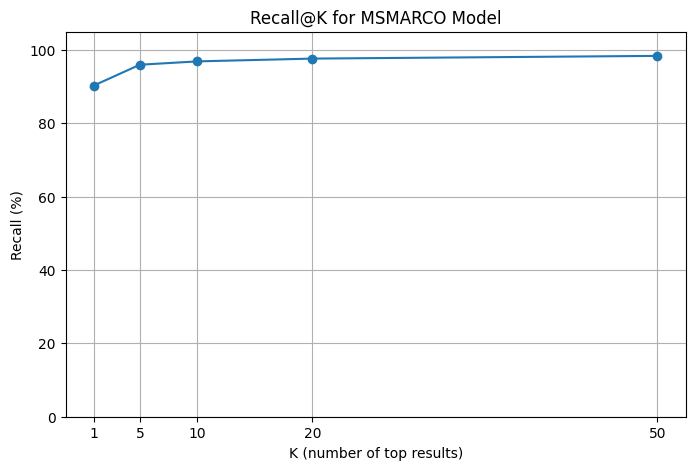

In [81]:

k_values_to_test = [1, 5, 10, 20, 50]
recall_values = [recall_at_k_results_marco[k] * 100 for k in k_values_to_test]  # convert recall to percentage

plt.figure(figsize=(8, 5))
plt.plot(k_values_to_test, recall_values, marker='o')
plt.title('Recall@K for MSMARCO Model')
plt.xlabel('K (number of top results)')
plt.ylabel('Recall (%)')
plt.grid(True)
plt.xticks(k_values_to_test)
plt.ylim(0, 105)
plt.show()


Conclusion The MSMARCO model substantially outperforms the base BERT model across all k values, with Recall@1 jumping from 46.94% to 90.37%. This confirms that using a model fine tuned on retrieval tasks dramatically improves performance in sentence similarity and ranking tasks.
Layer-wise similarity plots also indicate more discriminative and consistent representations compared to the non-finetuned version.


### Exercise 16 Comparison between models

(10p) Compare the models you used in this lab (and optionally the previous lab if you completed it). Discuss the results and the potential benefits and drawbacks of each method.

### Introduction for comparison

First let's remember that the exact task, for which we calculate recall is finding original sentences based on compressed ones. This is a specific task and it doesn't fully represent a metric for semantic proximity between sentences. That;s why for example in the previous lab we got such high results for BOW and TI-IDF (picture below).

In [77]:
from IPython.display import Image, display

In [78]:
img = Image(filename='photo_2025-05-01_17-45-43.jpg')
display(img)

Therefore we should treat this metric carefully, and not completely base our selection on it. Nevertheless, the results for the models from this lab are below.

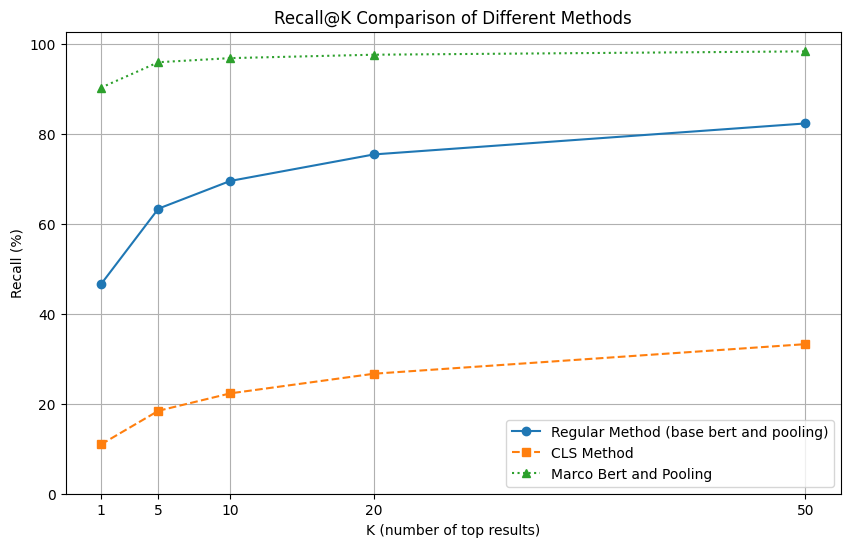

--- Recall@K Results ---
K Values: [1, 5, 10, 20, 50]
PyTorch Method 1 (%): ['46.58', '63.42', '69.59', '75.49', '82.38']
CLS Method (%):         ['10.96', '18.45', '22.33', '26.70', '33.28']
Marco(%):  ['90.33', '96.00', '96.91', '97.67', '98.41']


In [79]:
#### YOUR CODE HERE


k_values_to_test = [1, 5, 10, 20, 50]


ks = k_values_to_test


recalls_pytorch = [recall_at_k_results_pytorch.get(k, 0) * 100 for k in ks]
recalls_cls = [recall_at_k_results_cls.get(k, 0) * 100 for k in ks]
results_marco = [recall_at_k_results_marco.get(k, 0) * 100 for k in ks]

plt.figure(figsize=(10, 6))


plt.plot(ks, recalls_pytorch, marker='o', linestyle='-', label='Regular Method (base bert and pooling)')
plt.plot(ks, recalls_cls, marker='s', linestyle='--', label='CLS Method')
plt.plot(ks, results_marco, marker='^', linestyle=':', label='Marco Bert and Pooling')

plt.title('Recall@K Comparison of Different Methods')
plt.xlabel('K (number of top results)')
plt.ylabel('Recall (%)')


plt.xticks(ks)

plt.grid(True)


plt.ylim(bottom=0)


plt.legend()


plt.show()


print("--- Recall@K Results ---")
print(f"K Values: {ks}")
print(f"PyTorch Method 1 (%): {[f'{r:.2f}' for r in recalls_pytorch]}")
print(f"CLS Method (%):         {[f'{r:.2f}' for r in recalls_cls]}")
print(f"Marco(%):  {[f'{r:.2f}' for r in results_marco]}")


### Conclusions
1) CLS failed due to not being suitable for this task, explanation above
2) Marco BERT showed the best (and quite impressive) accuracy because it was trained on a large dataset specifically for semantical proximity which is important for our task.
3) Regular bert pooling method did fine, approximately like the method from lab 2 where we averaged word embeddings. It is interesting that BERT Pooling method captures much more contxet information that just word embeddings but for our specific task (compreesed to original sentences) it worked even worse.